<a href="https://colab.research.google.com/github/mafaldasalomao/binary_classification_breast_cancer/blob/main/binary_classification_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - Importing libs

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [1]:
import torch
torch.__version__

'1.12.1+cu113'

In [4]:
import torch.nn as nn

## 2 - Load database

In [ ]:
np.random.seed(42) # to reprocibility
torch.manual_seed(42)

In [6]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

In [8]:
previsores.shape, classe.shape


((569, 30), (569, 1))

In [9]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [10]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [12]:
np.unique(classe)

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


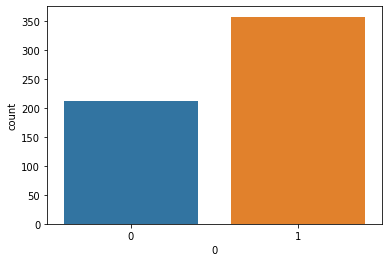

In [14]:
sns.countplot(classe['0']);

In [15]:
##split data
prev_train, prev_test, classe_train, classe_test = train_test_split(previsores,
                                                                    classe,
                                                                    test_size=0.2)

In [16]:
prev_train.shape

(455, 30)

## 3 - transform


In [17]:
type(prev_train)

pandas.core.frame.DataFrame

In [18]:
type(np.array(prev_train))

numpy.ndarray

In [24]:
prev_train = torch.tensor(np.array(prev_train), dtype=torch.float)
type(prev_train)
classe_train = torch.tensor(np.array(classe_train), dtype=torch.float)
type(classe_train)

prev_test = torch.tensor(np.array(prev_test), dtype=torch.float)
type(prev_test)
classe_test = torch.tensor(np.array(classe_test), dtype=torch.float)
type(classe_test)

torch.Tensor

In [25]:
dataset = torch.utils.data.TensorDataset(prev_train, classe_train)

In [27]:
train_loader = torch.utils.data.DataLoader(dataset,
                                           batch_size=32,
                                           shuffle=True)

## 4 - construct the model

In [31]:
# 30 neurons in input layer, equall total input class 30-> 16 -> 16 -> 1 output is a probability
model = nn.Sequential(
    nn.Linear(in_features = 30, out_features = 16), # dense layer in TF 
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [32]:
model.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [33]:
#loss function
loss_function = nn.BCELoss()

In [34]:
#optimixer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay=0.0001)

## 5 - Fit the model

In [ ]:
for epoch in range(100):  # total img / batch_size === total adjust
  running_loss = 0.  #save the loss
  for data in train_loader: # interate in train_loader (prev, classe) 32 in 32
    inputs, labels = data # get data 
    #print(inputs)
    #print("----------")
    #print(labels)
    optimizer.zero_grad() # zero to accumulators, direction from weig..
    outputs = model(inputs) # model.forward(inputs), get the predictions for all registers, and push to next
    #print(outputs)
    #compare pred with gtruth labels
    loss = loss_function(outputs, labels)
    #print(loss)
    #backpropagation
    loss.backward()
    #update wei...
    optimizer.step()
    running_loss += loss.item()
    #end epoch
  print(f"Época %3d: perda %.5f" % (epoch+1, running_loss/len(train_loader)))

In [37]:
## 6 - Visializing weights
params = list(model.parameters())
params

[Parameter containing:
 tensor([[ 1.9870e-01, -3.9322e-02,  1.5549e-01,  1.2284e-01, -2.2390e-02,
           2.6277e-02,  6.7252e-02, -7.0558e-02,  1.4913e-01, -1.3946e-01,
           2.2172e-02,  9.6697e-02, -6.3763e-02,  1.0309e-01, -1.1516e-02,
           1.6750e-01,  2.0751e-01, -9.5226e-03,  6.5487e-02, -2.7290e-01,
           1.8048e-01,  6.5521e-03, -6.1305e-02,  9.5299e-02,  7.1356e-03,
           2.1820e-01, -9.9141e-02,  1.5037e-01,  1.0712e-01, -9.1721e-02],
         [ 5.7846e-02,  4.5827e-02,  1.8268e-01, -6.0717e-02,  7.6728e-02,
           1.6202e-01, -1.9722e-01,  2.1300e-01,  5.6796e-02,  2.7469e-01,
          -2.8928e-02, -5.9390e-02,  1.3483e-01, -2.1478e-01, -1.5516e-02,
           1.1238e-01,  3.2372e-02,  1.1605e-01,  1.2063e-01, -3.1606e-01,
           3.0532e-02, -1.1498e-01,  4.7344e-02, -4.5114e-02, -1.8057e-01,
           2.0990e-01, -1.0580e-02, -6.1105e-02,  8.4665e-02, -7.7384e-02],
         [-1.2312e-01, -1.6346e-01, -1.2666e-01, -8.3283e-03, -6.8828e-02,


In [38]:
pesos0 = params[0]

In [39]:
pesos0.shape

torch.Size([16, 30])

In [40]:
print(pesos0)

Parameter containing:
tensor([[ 1.9870e-01, -3.9322e-02,  1.5549e-01,  1.2284e-01, -2.2390e-02,
          2.6277e-02,  6.7252e-02, -7.0558e-02,  1.4913e-01, -1.3946e-01,
          2.2172e-02,  9.6697e-02, -6.3763e-02,  1.0309e-01, -1.1516e-02,
          1.6750e-01,  2.0751e-01, -9.5226e-03,  6.5487e-02, -2.7290e-01,
          1.8048e-01,  6.5521e-03, -6.1305e-02,  9.5299e-02,  7.1356e-03,
          2.1820e-01, -9.9141e-02,  1.5037e-01,  1.0712e-01, -9.1721e-02],
        [ 5.7846e-02,  4.5827e-02,  1.8268e-01, -6.0717e-02,  7.6728e-02,
          1.6202e-01, -1.9722e-01,  2.1300e-01,  5.6796e-02,  2.7469e-01,
         -2.8928e-02, -5.9390e-02,  1.3483e-01, -2.1478e-01, -1.5516e-02,
          1.1238e-01,  3.2372e-02,  1.1605e-01,  1.2063e-01, -3.1606e-01,
          3.0532e-02, -1.1498e-01,  4.7344e-02, -4.5114e-02, -1.8057e-01,
          2.0990e-01, -1.0580e-02, -6.1105e-02,  8.4665e-02, -7.7384e-02],
        [-1.2312e-01, -1.6346e-01, -1.2666e-01, -8.3283e-03, -6.8828e-02,
          3.67

In [42]:
bias0 = params[1]
bias0

Parameter containing:
tensor([ 0.2406,  0.1219, -0.1976,  0.0248, -0.3329, -0.1787,  0.2729, -0.0396,
         0.0011,  0.0522,  0.2113, -0.2157, -0.1210, -0.1979,  0.0736,  0.1405],
       requires_grad=True)

In [44]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [45]:
bias1 = params[3]
bias1.shape

torch.Size([16])

## 7 - Evaluate the model

In [47]:
## using the test dataset
model.eval() #change to test mode, not update weights

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [48]:
preds = model.forward(prev_test)

In [49]:
preds


tensor([[1.0000e+00],
        [8.5884e-01],
        [5.5719e-09],
        [9.2957e-01],
        [9.3373e-01],
        [2.8721e-05],
        [2.7057e-14],
        [9.9022e-01],
        [1.0000e+00],
        [9.9642e-01],
        [9.8538e-03],
        [1.0000e+00],
        [9.8019e-01],
        [1.0000e+00],
        [6.9454e-13],
        [1.2624e-01],
        [3.0832e-02],
        [9.9336e-01],
        [9.3264e-01],
        [1.8121e-01],
        [3.3193e-01],
        [9.9744e-01],
        [9.7572e-01],
        [9.9097e-01],
        [4.7711e-01],
        [9.9985e-01],
        [5.9575e-01],
        [9.5328e-01],
        [9.1222e-01],
        [3.4533e-15],
        [9.9833e-01],
        [3.6759e-01],
        [9.9525e-01],
        [3.1355e-11],
        [8.3342e-20],
        [1.1089e-01],
        [8.7217e-01],
        [9.9532e-01],
        [9.9742e-01],
        [1.9495e-03],
        [2.0841e-03],
        [9.5869e-01],
        [1.0000e+00],
        [9.8840e-01],
        [9.5145e-01],
        [1

In [51]:
preds = np.array(preds> 0.5) #limiar
preds

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

In [53]:
#evaluate
acc = accuracy_score(classe_test, preds)
acc

0.9035087719298246

In [54]:
matriz = confusion_matrix(classe_test, preds)
matriz

array([[43,  6],
       [ 5, 60]])

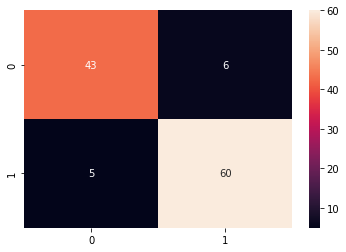

In [55]:
sns.heatmap(matriz, annot=True);
